# Cluster Free Text Comments

In [1]:
# 02_cluster_comments.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_survey_toolkit import nlp
from pandas_survey_toolkit.vis import cluster_heatmap_plot

# Create sample survey data with open-ended comments about a product
data = {
    'respondent_id': range(1, 21),
    'comments': [
        "Battery life is excellent, lasts all day",
        "The battery doesn't last long enough for me",
        "Battery performance is outstanding, very impressed",
        "Screen resolution is incredible, so sharp and clear",
        "Love the high-resolution display, colors are vibrant",
        "The screen is too reflective in bright light",
        "Camera quality is excellent for the price range",
        "Photos taken in low light are grainy and poor quality",
        "Camera autofocus is slow and often misses the shot",
        "The software is intuitive and easy to use",
        "User interface is confusing and not user-friendly",
        "Software keeps crashing when I open multiple apps",
        "Build quality feels premium and solid",
        "The device feels flimsy and cheaply made",
        "Very durable, survived several drops without damage",
        "Excellent value for money considering the features",
        "Overpriced for what you get compared to competitors",
        "Worth every penny, exceeded my expectations",
        "Customer service was unhelpful when I had issues",
        "Great customer support, quick and helpful responses"
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the original data
print("Original data:")
display(df)


y:\Python Scripts\pandas-survey-toolkit\.venv\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
y:\Python Scripts\pandas-survey-toolkit\.venv\Lib\site-packages\transformers\utils\generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


Original data:


respondent_id                                           comments
0               1           Battery life is excellent, lasts all day
1               2        The battery doesn't last long enough for me
2               3  Battery performance is outstanding, very impre...
3               4  Screen resolution is incredible, so sharp and ...
4               5  Love the high-resolution display, colors are v...
5               6       The screen is too reflective in bright light
6               7    Camera quality is excellent for the price range
7               8  Photos taken in low light are grainy and poor ...
8               9  Camera autofocus is slow and often misses the ...
9              10          The software is intuitive and easy to use
10             11  User interface is confusing and not user-friendly
11             12  Software keeps crashing when I open multiple apps
12             13              Build quality feels premium and solid
13             14           The device feels flimsy and cheaply made
14             15  Very durable, survived several drops without d...
15             16  Excellent value for money considering the feat...
16             17  Overpriced for what you get compared to compet...
17             18        Worth every penny, exceeded my expectations
18             19   Customer service was unhelpful when I had issues
19             20  Great customer support, quick and helpful resp...

In [2]:

# Cluster the comments
df_clustered = df.cluster_comments(input_column='comments', min_cluster_size=3, n_neighbors=5, cluster_selection_epsilon=0.5)

# Examine the clusters
print("\nComment clusters:")
display(df_clustered[['comments', 'cluster', 'cluster_probability']].sort_values('cluster'))

# Count comments per cluster
cluster_counts = df_clustered['cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'count']
print("\nComments per cluster:")
display(cluster_counts)

y:\Python Scripts\pandas-survey-toolkit\.venv\Lib\site-packages\transformers\utils\generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(



Comment clusters:


comments  cluster  \
19  Great customer support, quick and helpful resp...     -1.0   
18   Customer service was unhelpful when I had issues      0.0   
0            Battery life is excellent, lasts all day      0.0   
2   Battery performance is outstanding, very impre...      0.0   
1         The battery doesn't last long enough for me      0.0   
11  Software keeps crashing when I open multiple apps      1.0   
10  User interface is confusing and not user-friendly      1.0   
9           The software is intuitive and easy to use      1.0   
12              Build quality feels premium and solid      2.0   
13           The device feels flimsy and cheaply made      2.0   
14  Very durable, survived several drops without d...      2.0   
15  Excellent value for money considering the feat...      2.0   
16  Overpriced for what you get compared to compet...      2.0   
17        Worth every penny, exceeded my expectations      2.0   
8   Camera autofocus is slow and often misses the ...      3.0   
6     Camera quality is excellent for the price range      3.0   
5        The screen is too reflective in bright light      3.0   
4   Love the high-resolution display, colors are v...      3.0   
7   Photos taken in low light are grainy and poor ...      3.0   
3   Screen resolution is incredible, so sharp and ...      3.0   

    cluster_probability  
19             0.000000  
18             0.667263  
0              1.000000  
2              1.000000  
1              1.000000  
11             1.000000  
10             1.000000  
9              1.000000  
12             1.000000  
13             0.830560  
14             0.906771  
15             1.000000  
16             1.000000  
17             1.000000  
8              0.700035  
6              0.700035  
5              1.000000  
4              1.000000  
7              0.847425  
3              1.000000


Comments per cluster:


cluster  count
0      3.0      6
1      2.0      6
2      0.0      4
3      1.0      3
4     -1.0      1

In [3]:
df_clustered.head()

respondent_id                                           comments  \
0              1           Battery life is excellent, lasts all day   
1              2        The battery doesn't last long enough for me   
2              3  Battery performance is outstanding, very impre...   
3              4  Screen resolution is incredible, so sharp and ...   
4              5  Love the high-resolution display, colors are v...   

                                  sentence_embedding     umap_x    umap_y  \
0  [-0.038631026, 0.044625234, -0.028667396, -0.0...  11.356366  4.052678   
1  [-0.0007719228, -0.0042446144, 0.011075384, -0...  11.582358  3.586939   
2  [-0.008022247, 0.09049879, -0.0867905, -0.0022...  11.752824  4.191682   
3  [-0.014808243, -0.03135826, 0.035538964, -0.05...  13.497684  2.565261   
4  [-0.029058423, 0.026945723, 0.040125024, -0.05...  13.295995  2.067326   

   cluster  cluster_probability  
0      0.0                  1.0  
1      0.0                  1.0  
2      0.0                  1.0  
3      3.0                  1.0  
4      3.0                  1.0

You can see on the datamapplot that similar comments are closer together. By varying the cluster_epsilon you can tweak the number of clusters (clustering works better on much larger datasets)

<InteractiveFigure width=100% height=800>
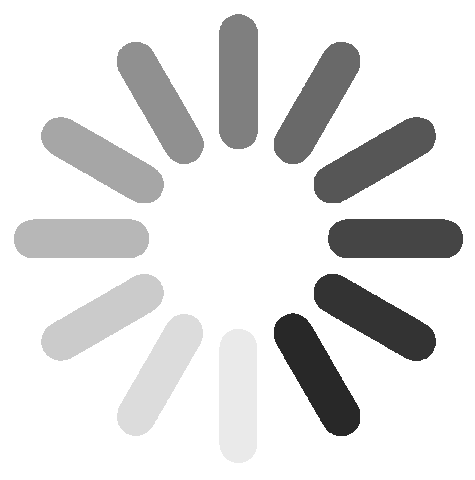

In [4]:
import datamapplot

datamapplot.create_interactive_plot(df_clustered[['umap_x', 'umap_y']].values, df_clustered['cluster'].astype(str).values, hover_text=df_clustered['comments'])